# Preprocessing and clustering 3k PBMCs

https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [2]:
# !mkdir data
# !wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz
# !cd data; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz
# !mkdir write

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/home/keiyu/src/miniconda/envs/scanpy/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.6 anndata==0.10.4 umap==0.5.5 numpy==1.26.3 scipy==1.11.4 pandas==2.1.4 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.10.8 pynndescent==0.5.11


In [3]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [4]:
adata = sc.read_10x_mtx(
    'data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache/data-filtered_gene_bc_matrices-hg19-matrix.h5ad


/home/keiyu/src/miniconda/envs/scanpy/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


## Anndata

https://emoriroom.hatenablog.com/entry/2020/11/06/190000

In [5]:
print("# Data Matrix")
display(adata.X)
print()
print("# Rows")
display(adata.obs)
print()
print("# Colunms")
display(adata.var)

# Data Matrix


<2700x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 2286884 stored elements in Compressed Sparse Column format>


# Rows


Empty DataFrame
Columns: []
Index: [AAACATACAACCAC-1, AAACATTGAGCTAC-1, AAACATTGATCAGC-1, AAACCGTGCTTCCG-1, AAACCGTGTATGCG-1, AAACGCACTGGTAC-1, AAACGCTGACCAGT-1, AAACGCTGGTTCTT-1, AAACGCTGTAGCCA-1, AAACGCTGTTTCTG-1, AAACTTGAAAAACG-1, AAACTTGATCCAGA-1, AAAGAGACGAGATA-1, AAAGAGACGCGAGA-1, AAAGAGACGGACTT-1, AAAGAGACGGCATT-1, AAAGATCTGGGCAA-1, AAAGCAGAAGCCAT-1, AAAGCAGATATCGG-1, AAAGCCTGTATGCG-1, AAAGGCCTGTCTAG-1, AAAGTTTGATCACG-1, AAAGTTTGGGGTGA-1, AAAGTTTGTAGAGA-1, AAAGTTTGTAGCGT-1, AAATCAACAATGCC-1, AAATCAACACCAGT-1, AAATCAACCAGGAG-1, AAATCAACCCTATT-1, AAATCAACGGAAGC-1, AAATCAACTCGCAA-1, AAATCATGACCACA-1, AAATCCCTCCACAA-1, AAATCCCTGCTATG-1, AAATGTTGAACGAA-1, AAATGTTGCCACAA-1, AAATGTTGTGGCAT-1, AAATTCGAAGGTTC-1, AAATTCGAATCACG-1, AAATTCGAGCTGAT-1, AAATTCGAGGAGTG-1, AAATTCGATTCTCA-1, AAATTGACACGACT-1, AAATTGACTCGCTC-1, AACAAACTCATTTC-1, AACAAACTTTCGTT-1, AACAATACGACGAG-1, AACACGTGCAGAGG-1, AACACGTGGAAAGT-1, AACACGTGGAACCT-1, AACACGTGGCTACA-1, AACACGTGTACGAC-1, AACAGCACAAGAGT-1, AACATTGATGGGAG-1, AACCAGTGATACCG-1, AACCCAGATCGCTC-1, AACCGATGCTCCCA-1, AACCGATGGTCATG-1, AACCGATGTTCTAC-1, AACCGCCTAGCGTT-1, AACCGCCTCTACGA-1, AACCTACTGTGAGG-1, AACCTACTGTGTTG-1, AACCTTACGAGACG-1, AACCTTACGCGAGA-1, AACCTTACTAACGC-1, AACCTTTGGACGGA-1, AACCTTTGTACGCA-1, AACGCAACAAGTAG-1, AACGCATGACCCAA-1, AACGCATGCCTTCG-1, AACGCATGTACTTC-1, AACGCCCTCGGGAA-1, AACGCCCTCGTACA-1, AACGCCCTGCTTAG-1, AACGCCCTGGCATT-1, AACGTCGAGTATCG-1, AACGTGTGAAAGCA-1, AACGTGTGGCGGAA-1, AACGTGTGTCCAAG-1, AACGTGTGTGCTTT-1, AACTACCTTAGAGA-1, AACTCACTCAAGCT-1, AACTCACTTGGAGG-1, AACTCGGAAAGTGA-1, AACTCGGAAGGTCT-1, AACTCTTGCAGGAG-1, AACTGTCTCCCTTG-1, AACTTGCTACGCTA-1, AACTTGCTGGGACA-1, AAGAACGAGTGTTG-1, AAGAAGACGTAGGG-1, AAGACAGAAGTCTG-1, AAGACAGAGGATCT-1, AAGACAGATTACCT-1, AAGAGATGGGTAGG-1, AAGATGGAAAACAG-1, AAGATGGAGAACTC-1, AAGATGGAGATAAG-1, AAGATTACAACCTG-1, ...]

[2700 rows x 0 columns]


# Colunms


gene_ids
MIR1302-10    ENSG00000243485
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
RP11-34P13.7  ENSG00000238009
RP11-34P13.8  ENSG00000239945
...                       ...
AC145205.1    ENSG00000215635
BAGE5         ENSG00000268590
CU459201.1    ENSG00000251180
AC002321.2    ENSG00000215616
AC002321.1    ENSG00000215611

[32738 rows x 1 columns]

In [6]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [7]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

## Preprocessing

normalizing counts per cell
    finished (0:00:00)


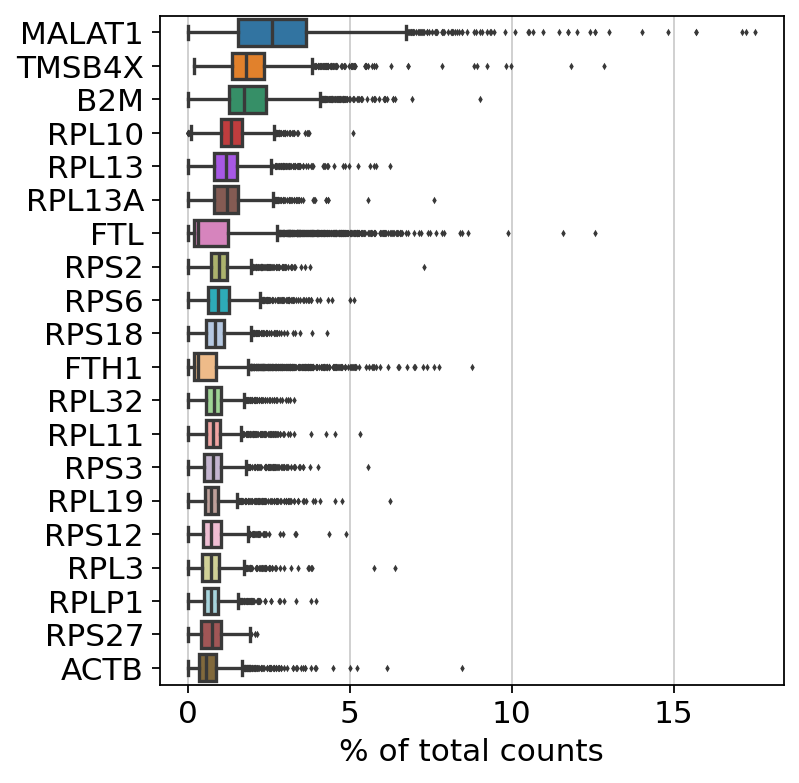

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [9]:
tot_counts = adata.X.sum(axis=1)
malat1_counts = adata[:, adata.var_names.isin(['MALAT1'])].X.A
print("# MATLAT1")
print(f"mean: {np.mean(malat1_counts / tot_counts * 100)}")
print(f"max: {np.max(malat1_counts / tot_counts * 100)}")

# MATLAT1
mean: 2.8059254998289465
max: 17.5105482339859


In [10]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


In [11]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/keiyu/src/miniconda/envs/scanpy/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/keiyu/src/miniconda/envs/scanpy/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/keiyu/src/miniconda/envs/scanpy/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/keiyu/src/miniconda/envs/scanpy/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

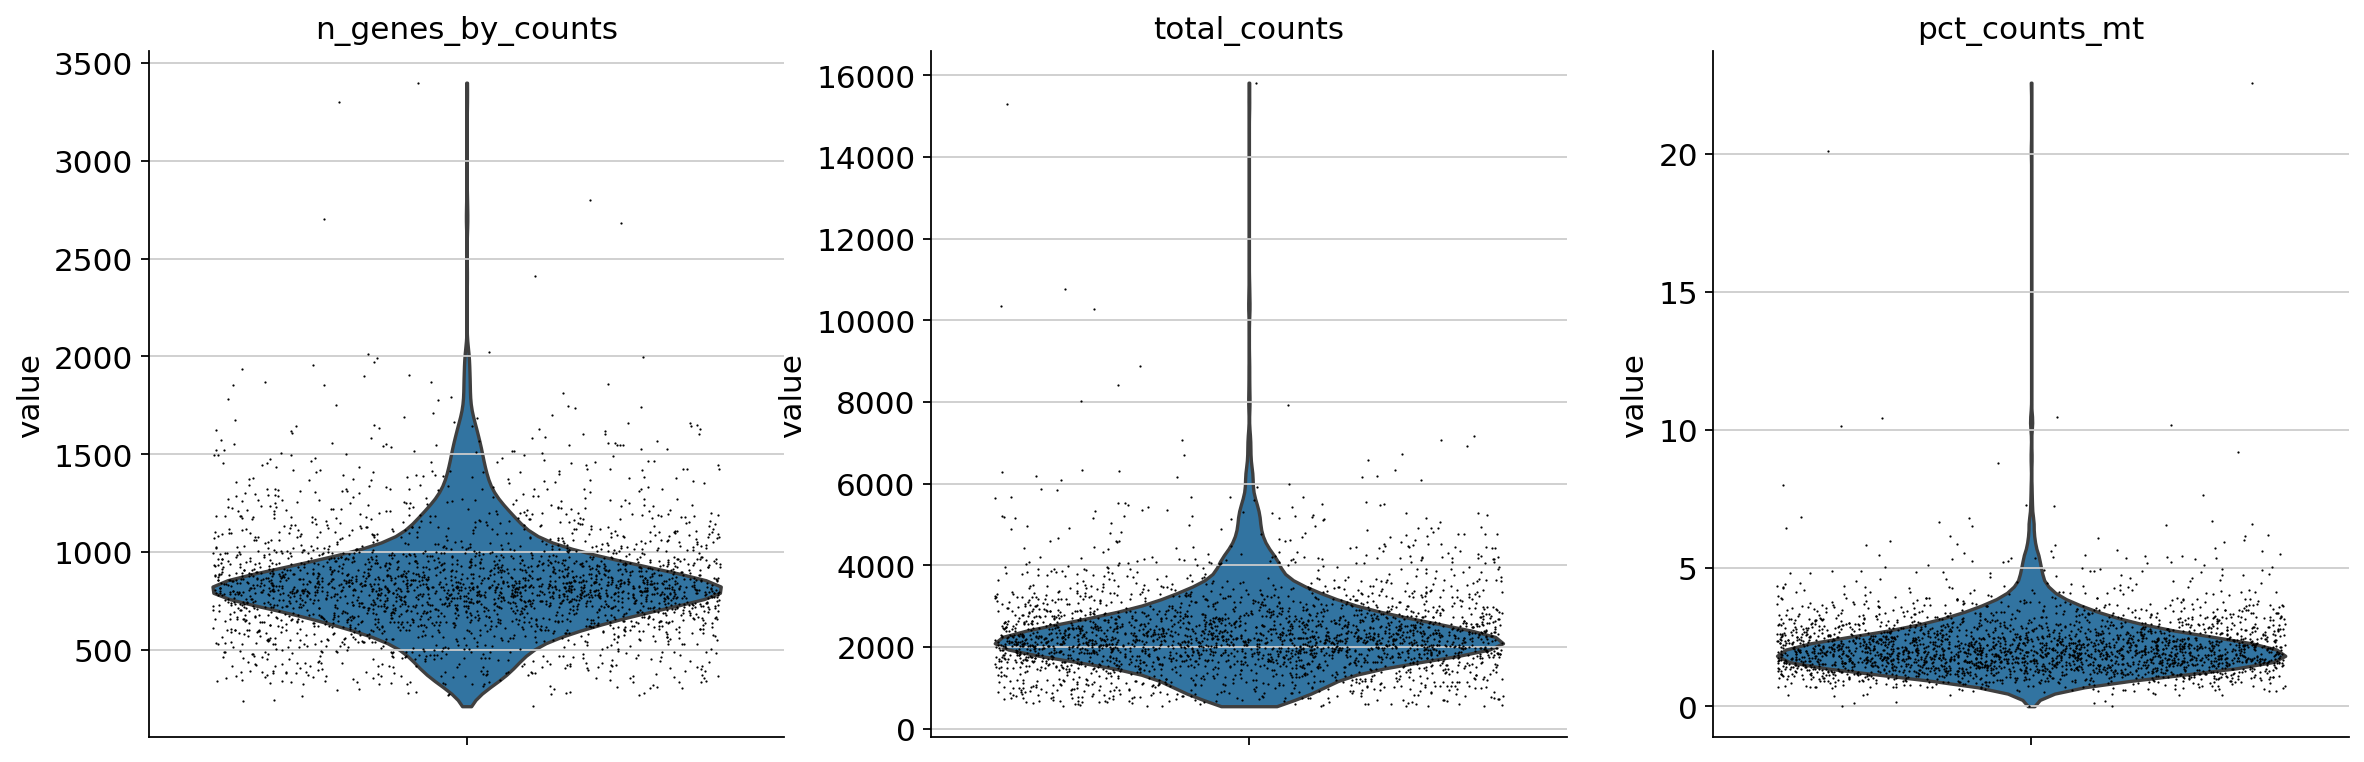

In [12]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [13]:
print(f"number of nonzero genes: {np.where(adata.X.A>0, 1, 0).sum(axis=1).mean()}")
print(f"mean toatal count: {adata.X.sum(axis=1).mean()}")

number of nonzero genes: 845.5466666666666
mean toatal count: 2365.376953125


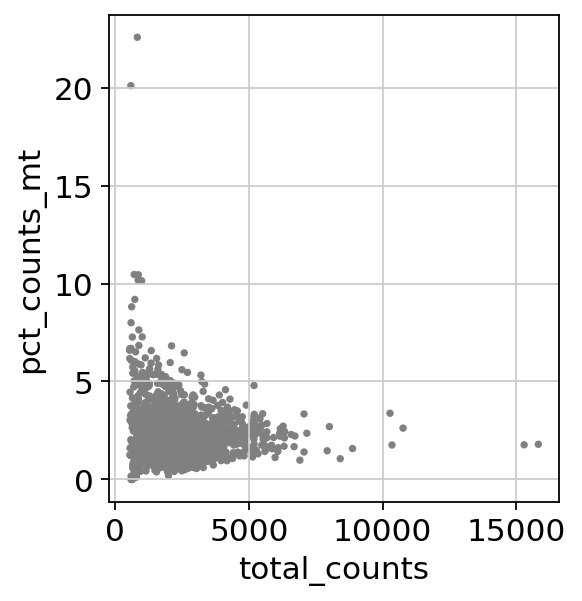

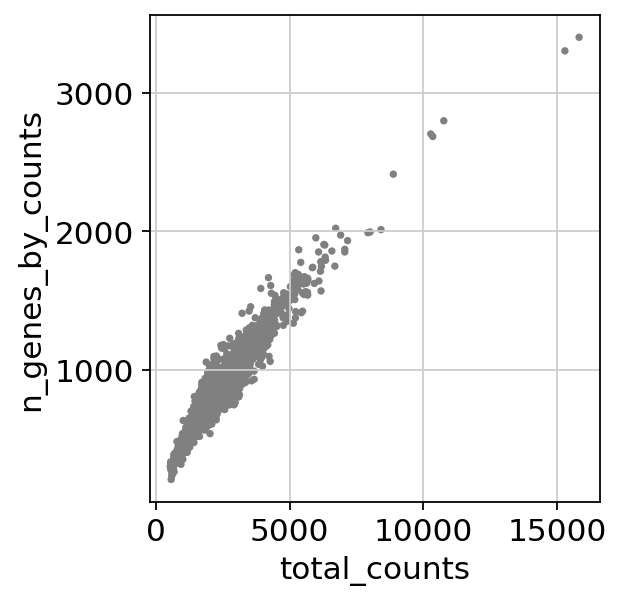

In [14]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [19]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [20]:
adata.X.shape

(2638, 13714)

In [21]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/home/keiyu/src/miniconda/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [22]:
sc.pp.log1p(adata)

In [23]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/keiyu/src/miniconda/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


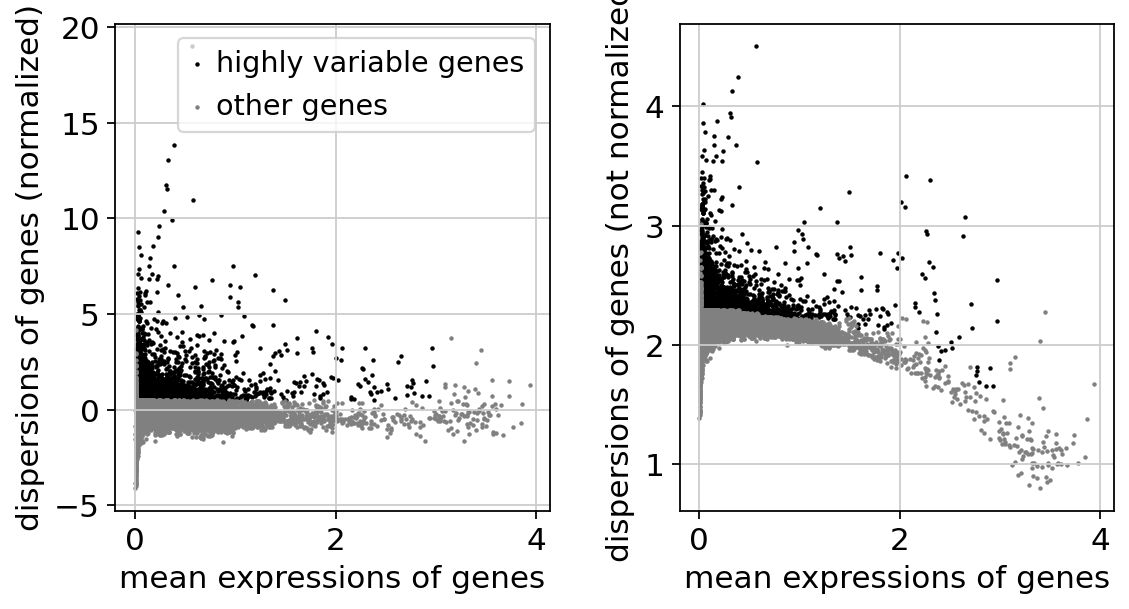

In [24]:
sc.pl.highly_variable_genes(adata)

よくわからん